In [1]:
# Supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Reading the datasets
import pandas as pd

df_real = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
df_fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

display(df_real)
display(df_fake)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
# Information about the datasets

display(df_real.info())
display(df_fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None

In [4]:
# Dropping publishers

def remove_publisher(text):
    if " - " in text:
        return text.split(" - ", 1)[1]
    return text

df_real["text"] = df_real["text"].apply(remove_publisher)
df_fake["text"] = df_fake["text"].apply(remove_publisher)

display(df_real)
display(df_fake)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
# Remove html
from bs4 import BeautifulSoup

def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    html_free = soup.get_text()
    return html_free

In [6]:
# Remove punctuation
import string

def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [7]:
# Tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")

def word_tokenizer(text):
    tokenized_text = tokenizer.tokenize(text.lower())
    return tokenized_text

In [8]:
# Remove stopwords
from nltk.corpus import stopwords

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [9]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_text

In [10]:
# Data cleaning

def clean_data(text):
    text = remove_html(text)
    text = remove_punctuation(text)
    text = word_tokenizer(text)
    text = remove_stopwords(text)
    text = word_lemmatizer(text)
    return text

df_real["title"] = df_real["title"].apply(clean_data)
df_real["text"] = df_real["text"].apply(clean_data)

df_fake["title"] = df_fake["title"].apply(clean_data)
df_fake["text"] = df_fake["text"].apply(clean_data)

display(df_real)
display(df_fake)

,title,text,subject,date
0,"[u, budget, fight, loom, republican, flip, fis...","[head, conservative, republican, faction, u, c...",politicsNews,"December 31, 2017"
1,"[u, military, accept, transgender, recruit, mo...","[transgender, people, allowed, first, time, en...",politicsNews,"December 29, 2017"
2,"[senior, u, republican, senator, let, mr, muel...","[special, counsel, investigation, link, russia...",politicsNews,"December 31, 2017"
3,"[fbi, russia, probe, helped, australian, diplo...","[trump, campaign, adviser, george, papadopoulo...",politicsNews,"December 30, 2017"
4,"[trump, want, postal, service, charge, much, a...","[president, donald, trump, called, u, postal, ...",politicsNews,"December 29, 2017"
...,...,...,...,...
21412,"[fully, committed, nato, back, new, u, approac...","[nato, ally, tuesday, welcomed, president, don...",worldnews,"August 22, 2017"
21413,"[lexisnexis, withdrew, two, product, chinese, ...","[lexisnexis, provider, legal, regulatory, busi...",worldnews,"August 22, 2017"
21414,"[minsk, cultural, hub, becomes, authority]","[shadow, disused, sovietera, factory, minsk, s...",worldnews,"August 22, 2017"
21415,"[vatican, upbeat, possibility, pope, francis, ...","[vatican, secretary, state, cardinal, pietro, ...",worldnews,"August 22, 2017"


,title,text,subject,date
0,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, american, happy, new, ye...",News,"December 31, 2017"
1,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",News,"December 31, 2017"
2,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017"
3,"[trump, obsessed, even, obama, name, coded, we...","[christmas, day, donald, trump, announced, wou...",News,"December 29, 2017"
4,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017"
...,...,...,...,...
23476,"[mcpain, john, mccain, furious, iran, treated,...","[21st, century, wire, say, 21wire, reported, e...",Middle-east,"January 16, 2016"
23477,"[justice, yahoo, settle, email, privacy, class...","[21st, century, wire, say, familiar, theme, wh...",Middle-east,"January 16, 2016"
23478,"[sunnistan, u, allied, safe, zone, plan, take,...","[patrick, henningsen, 21st, century, wireremem...",Middle-east,"January 15, 2016"
23479,"[blow, 700, million, al, jazeera, america, fin...","[21st, century, wire, say, al, jazeera, americ...",Middle-east,"January 14, 2016"


In [11]:
# Adding label and merging data

df_real["label"] = 1
df_fake["label"] = 0

data = pd.concat([df_real, df_fake])
print(data.shape)

display(data)

(44898, 5)


,title,text,subject,date,label
0,"[u, budget, fight, loom, republican, flip, fis...","[head, conservative, republican, faction, u, c...",politicsNews,"December 31, 2017",1
1,"[u, military, accept, transgender, recruit, mo...","[transgender, people, allowed, first, time, en...",politicsNews,"December 29, 2017",1
2,"[senior, u, republican, senator, let, mr, muel...","[special, counsel, investigation, link, russia...",politicsNews,"December 31, 2017",1
3,"[fbi, russia, probe, helped, australian, diplo...","[trump, campaign, adviser, george, papadopoulo...",politicsNews,"December 30, 2017",1
4,"[trump, want, postal, service, charge, much, a...","[president, donald, trump, called, u, postal, ...",politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,"[mcpain, john, mccain, furious, iran, treated,...","[21st, century, wire, say, 21wire, reported, e...",Middle-east,"January 16, 2016",0
23477,"[justice, yahoo, settle, email, privacy, class...","[21st, century, wire, say, familiar, theme, wh...",Middle-east,"January 16, 2016",0
23478,"[sunnistan, u, allied, safe, zone, plan, take,...","[patrick, henningsen, 21st, century, wireremem...",Middle-east,"January 15, 2016",0
23479,"[blow, 700, million, al, jazeera, america, fin...","[21st, century, wire, say, al, jazeera, americ...",Middle-east,"January 14, 2016",0


In [12]:
# Building corpus

corpus = []
for lst in data["title"] + data["text"]:
    for item in lst:
        corpus.append(item)

print(len(corpus))

10825531


In [13]:
# Building vocabulary

vocab = set(corpus)
print("%d unique words" % (len(vocab)))

217287 unique words


In [14]:
# Calculate tf-idf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

count_vect = CountVectorizer(stop_words="english")
sf = count_vect.fit_transform(corpus)

tfidf_trans = TfidfTransformer()
transformed_weights = tfidf_trans.fit_transform(sf)

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
df_weights = pd.DataFrame({"term": count_vect.get_feature_names(), "weight": weights})
df_weights.sort_values(by="weight", ascending=False).head(10)

,term,weight
198382,trump,0.013140
170046,said,0.012028
183685,state,0.005516
154131,president,0.005041
143308,people,0.003875
164441,republican,0.003689
214836,year,0.003144
130948,new,0.002934
135295,obama,0.002777
45559,clinton,0.002762


In [15]:
# Build word-tfidf dictionary

tfidf_score = {}
for _, item in df_weights.iterrows():
    tfidf_score[item["term"]] = item["weight"]

print(len(tfidf_score))

217036


In [16]:
# Set mean tfidf score

mean_tfidf = df_weights["weight"].mean()
print("%.6f" % mean_tfidf)

0.000004


In [17]:
# Function to drop words based on tfidf score

def drop_words(lst):
    text = []
    for item in lst:
        if item in tfidf_score and tfidf_score[item]>=mean_tfidf:
            text.append(item)
    return text

In [18]:
# Filter data

data["title"] = data["title"].apply(drop_words)
data["text"] = data["text"].apply(drop_words)

display(data)

,title,text,subject,date,label
0,"[budget, fight, loom, republican, flip, fiscal...","[head, conservative, republican, faction, cong...",politicsNews,"December 31, 2017",1
1,"[military, accept, transgender, recruit, monda...","[transgender, people, allowed, time, enlist, m...",politicsNews,"December 29, 2017",1
2,"[senior, republican, senator, let, mr, mueller...","[special, counsel, investigation, link, russia...",politicsNews,"December 31, 2017",1
3,"[fbi, russia, probe, helped, australian, diplo...","[trump, campaign, adviser, george, papadopoulo...",politicsNews,"December 30, 2017",1
4,"[trump, want, postal, service, charge, amazon,...","[president, donald, trump, called, postal, ser...",politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,"[john, mccain, furious, iran, treated, sailor]","[21st, century, wire, say, 21wire, reported, e...",Middle-east,"January 16, 2016",0
23477,"[justice, yahoo, settle, email, privacy, class...","[21st, century, wire, say, familiar, theme, di...",Middle-east,"January 16, 2016",0
23478,"[allied, safe, zone, plan, territorial, northe...","[patrick, henningsen, 21st, century, obama, ad...",Middle-east,"January 15, 2016",0
23479,"[blow, 700, million, al, jazeera, america, fin...","[21st, century, wire, say, al, jazeera, americ...",Middle-east,"January 14, 2016",0


In [19]:
# How many words present in each sample 

length = []
[length.append(len(str(text))) for text in data["title"] + data["text"]]
data["length"] = length
data.head()

,title,text,subject,date,label,length
0,"[budget, fight, loom, republican, flip, fiscal...","[head, conservative, republican, faction, cong...",politicsNews,"December 31, 2017",1,4302
1,"[military, accept, transgender, recruit, monda...","[transgender, people, allowed, time, enlist, m...",politicsNews,"December 29, 2017",1,3780
2,"[senior, republican, senator, let, mr, mueller...","[special, counsel, investigation, link, russia...",politicsNews,"December 31, 2017",1,2546
3,"[fbi, russia, probe, helped, australian, diplo...","[trump, campaign, adviser, george, papadopoulo...",politicsNews,"December 30, 2017",1,2334
4,"[trump, want, postal, service, charge, amazon,...","[president, donald, trump, called, postal, ser...",politicsNews,"December 29, 2017",1,4502


In [20]:
# Get minimum, maximum, average length

min(data["length"]), max(data["length"]), round(sum(data["length"])/len(data["length"]))

(2, 43587, 2102)

In [21]:
# How many samples have less than 50 words

print(len(data[data["length"] < 50]))
data['text'][data['length'] < 50]

36


8970               []
9358               []
11492              []
11739              []
11782              []
11854              []
11875              []
11900              []
12026              []
12038              []
12055              []
12379              []
12469              []
12502              []
12831              []
13955         [watch]
14320              []
14339        [spread]
15363              []
15507              []
15508              []
15641              []
15674              []
15719              []
15839              []
15840              []
15851    [want, miss]
17270              []
17355              []
17432              []
17433              []
20609         [watch]
20903        [spread]
21869              []
21870              []
21882    [want, miss]
Name: text, dtype: object

In [22]:
# Drop the outliers

data = data.drop(data["text"][data["length"] < 50].index, axis=0)
min(data["length"]), max(data["length"]), round(sum(data["length"])/len(data["length"]))

(50, 43587, 2103)

In [23]:
# Dropping unnecessary features

data["text"] = data["title"] + data["text"]
data.drop(columns=["title", "subject", "date", "length"], axis=1, inplace=True)

display(data)

,text,label
0,"[budget, fight, loom, republican, flip, fiscal...",1
1,"[military, accept, transgender, recruit, monda...",1
2,"[senior, republican, senator, let, mr, mueller...",1
3,"[fbi, russia, probe, helped, australian, diplo...",1
4,"[trump, want, postal, service, charge, amazon,...",1
...,...,...
23476,"[john, mccain, furious, iran, treated, sailor,...",0
23477,"[justice, yahoo, settle, email, privacy, class...",0
23478,"[allied, safe, zone, plan, territorial, northe...",0
23479,"[blow, 700, million, al, jazeera, america, fin...",0


In [24]:
# Corpus size and vocabulary size

corpus = []
for lst in data["text"]:
    for item in lst:
        corpus.append(item)

print(len(corpus))
vocab = set(corpus)
print(len(vocab))

9079198
13919


In [25]:
# Importing libraries and setting parameters

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim = 100
max_length = 2103
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = len(vocab)


In [26]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.text,data.label,test_size=0.3, random_state=42, shuffle=True, stratify=data.label)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31380,)
(31380,)
(13449,)
(13449,)


In [27]:
# Tokenize

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
vocab_size=len(word_index)
tokenixed_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(tokenixed_train, maxlen=max_length, truncating=trunc_type)
tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(tokenized_test, maxlen=max_length, truncating=trunc_type)

In [28]:
# Download the Glove vector

embeddings_index = {}

with open("../input/glove6b100dtxt/glove.6B.100d.txt") as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype="float32");
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [29]:
# Make numpy arrays

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [30]:
# Build the model

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, dropout = 0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout = 0.2)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = EarlyStopping(monitor="val_loss", min_delta=1e-3, patience=5, verbose=1, mode="auto", restore_best_weights=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2103, 100)         1392000   
_________________________________________________________________
bidirectional (Bidirectional (None, 2103, 128)         84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,521,921
Trainable params: 1,521,921
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train the model

history = model.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), callbacks=[callback], epochs=10, verbose=1)

Epoch 1/10
491/491 [==============================] - 199s 405ms/step - loss: 0.1269 - accuracy: 0.9514 - val_loss: 0.0739 - val_accuracy: 0.9724
Epoch 2/10
491/491 [==============================] - 198s 403ms/step - loss: 0.0381 - accuracy: 0.9869 - val_loss: 0.0784 - val_accuracy: 0.9738
Epoch 3/10
491/491 [==============================] - 200s 407ms/step - loss: 0.0442 - accuracy: 0.9843 - val_loss: 0.1145 - val_accuracy: 0.9596
Epoch 4/10
491/491 [==============================] - 200s 407ms/step - loss: 0.0425 - accuracy: 0.9850 - val_loss: 0.0582 - val_accuracy: 0.9809
Epoch 5/10
491/491 [==============================] - 200s 408ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 6/10
491/491 [==============================] - 200s 408ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.1021 - val_accuracy: 0.9704
Epoch 7/10
491/491 [==============================] - 201s 410ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0718 -

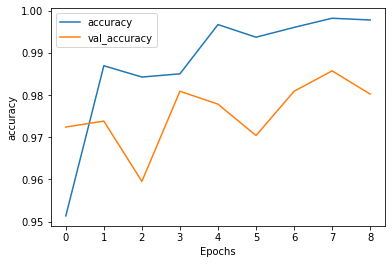

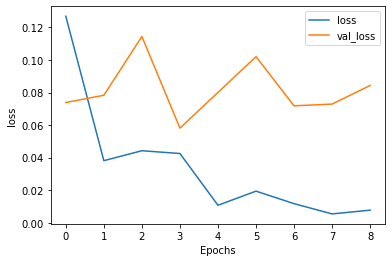

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_" + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_" + string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")